# Aliasing

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
import random
import scipy.io.wavfile

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving signalpro.py to signalpro.py


{'signalpro.py': b'import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/\r\nimport numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/\r\nimport scipy as sp # for signal processing\r\nfrom scipy import signal\r\nfrom scipy.spatial import distance\r\nimport librosa\r\nimport random\r\n\r\n### SINE AND COSINE GENERATOR FUNCTIONS ###\r\n\r\ndef create_sine_waves(freqs, sampling_rate, total_time_in_secs = None, return_time = False):\r\n    \'\'\'Creates multiple sine waves corresponding to the freq array, sampling rate, and length\r\n    \r\n       Returns a tuple list of (freq, sine_wave) or (freq, (time, sine_wave))\r\n       depending on whether return_time is True or False\r\n    \'\'\'\r\n    sine_waves = []\r\n    for freq in freqs:\r\n        sine_waves.append((freq, create_sine_wave(freq, sampling_rate, total_time_in_secs, return_time)))\r\n    return sine_waves\r\n\r\ndef create_sine

In [6]:
import signalpro

Sampling rate: 50.0 Hz


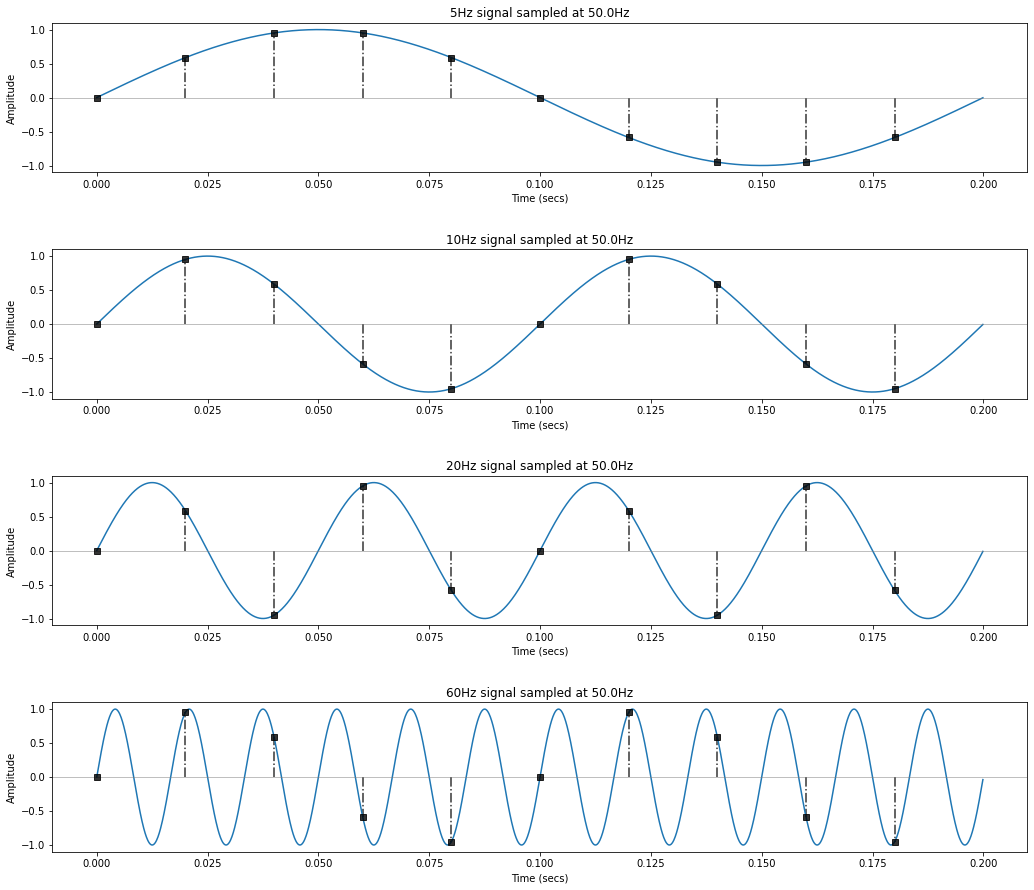

In [7]:
total_time_in_secs = 0.2

# Create our "real-world" continuous signals (which is obviously not possible on a digital computer, so we fake it)
real_world_continuous_speed = 10000
real_world_signal1_freq = 5
time, real_world_signal1 = signalpro.create_sine_wave(real_world_signal1_freq, real_world_continuous_speed, 
                                               total_time_in_secs, return_time = True)

real_world_signal2_freq = 10
real_world_signal2 = signalpro.create_sine_wave(real_world_signal2_freq, real_world_continuous_speed, 
                                               total_time_in_secs)

real_world_signal3_freq = 20
real_world_signal3 = signalpro.create_sine_wave(real_world_signal3_freq, real_world_continuous_speed, 
                                               total_time_in_secs)

real_world_signal4_freq = 60
real_world_signal4 =signalpro.create_sine_wave(real_world_signal4_freq, real_world_continuous_speed, 
                                               total_time_in_secs)

# Create the sampled versions of these continuous signals
resample_factor = 200 # should be an integer
sampled_time = time[::resample_factor]
sampled_signal1 = real_world_signal1[::resample_factor]
sampled_signal2 = real_world_signal2[::resample_factor]
sampled_signal3 = real_world_signal3[::resample_factor]
sampled_signal4 = real_world_signal4[::resample_factor]
sampling_rate = real_world_continuous_speed / resample_factor
print(f"Sampling rate: {sampling_rate} Hz")

# Visualize the sampled versions
fig, axes = plt.subplots(4, 1, figsize=(15,13))
axes[0].plot(time, real_world_signal1)
axes[0].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[0].plot(sampled_time, sampled_signal1, linestyle='None', alpha=0.8, marker='s', color='black')
axes[0].vlines(sampled_time, ymin=0, ymax=sampled_signal1, linestyle='-.', alpha=0.8, color='black')
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("Time (secs)")
axes[0].set_title(f"{real_world_signal1_freq}Hz signal sampled at {sampling_rate}Hz")

axes[1].plot(time, real_world_signal2)
axes[1].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[1].plot(sampled_time, sampled_signal2, linestyle='None', alpha=0.8, marker='s', color='black')
axes[1].vlines(sampled_time, ymin=0, ymax=sampled_signal2, linestyle='-.', alpha=0.8, color='black')
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("Time (secs)")
axes[1].set_title(f"{real_world_signal2_freq}Hz signal sampled at {sampling_rate}Hz")

axes[2].plot(time, real_world_signal3)
axes[2].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[2].plot(sampled_time, sampled_signal3, linestyle='None', alpha=0.8, marker='s', color='black')
axes[2].vlines(sampled_time, ymin=0, ymax=sampled_signal3, linestyle='-.', alpha=0.8, color='black')
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Time (secs)")
axes[2].set_title(f"{real_world_signal3_freq}Hz signal sampled at {sampling_rate}Hz")

axes[3].plot(time, real_world_signal4)
axes[3].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[3].plot(sampled_time, sampled_signal4, linestyle='None', alpha=0.8, marker='s', color='black')
axes[3].vlines(sampled_time, ymin=0, ymax=sampled_signal4, linestyle='-.', alpha=0.8, color='black')
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Time (secs)")
axes[3].set_title(f"{real_world_signal4_freq}Hz signal sampled at {sampling_rate}Hz")

fig.tight_layout(pad = 3.0)

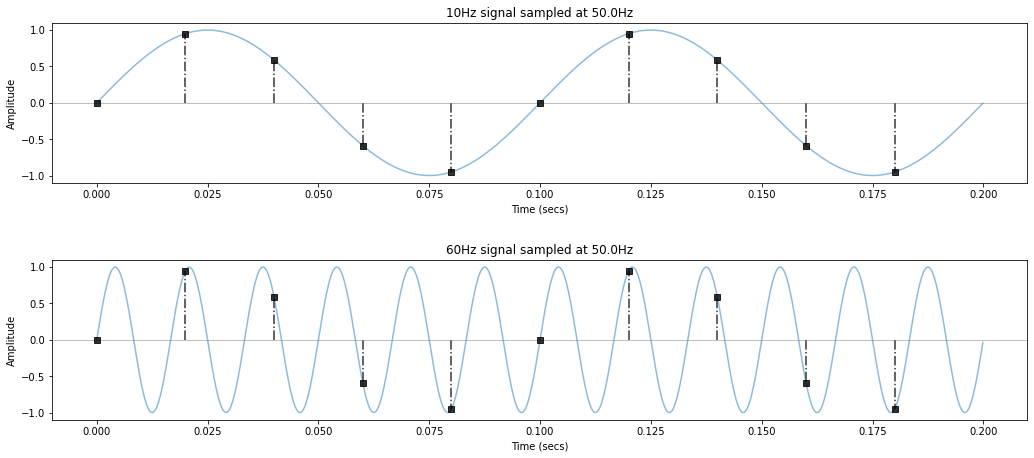

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(15,7))

axes[0].plot(time, real_world_signal2, alpha=0.5)
axes[0].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[0].plot(sampled_time, sampled_signal2, linestyle='None', alpha=0.8, marker='s', color='black')
axes[0].vlines(sampled_time, ymin=0, ymax=sampled_signal2, linestyle='-.', alpha=0.8, color='black')
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("Time (secs)")
axes[0].set_title(f"{real_world_signal2_freq}Hz signal sampled at {sampling_rate}Hz")

axes[1].plot(time, real_world_signal4, alpha=0.5)
axes[1].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[1].plot(sampled_time, sampled_signal4, linestyle='None', alpha=0.8, marker='s', color='black')
axes[1].vlines(sampled_time, ymin=0, ymax=sampled_signal4, linestyle='-.', alpha=0.8, color='black')
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("Time (secs)")
axes[1].set_title(f"{real_world_signal4_freq}Hz signal sampled at {sampling_rate}Hz")

fig.tight_layout(pad = 3.0)

In [9]:
fs = sampling_rate
real_world_signal_freq = 110 # change this
nearest_integer_multiple = round(real_world_signal_freq / fs)
aliased_freq = abs(nearest_integer_multiple * fs - real_world_signal_freq)

print(f"Real-world signal freq: {real_world_signal_freq}")
print(f"Sampling rate: {fs}")
print(f"Nearest integer multiple: {nearest_integer_multiple}")
print(f"Aliased freq: {aliased_freq}")

Real-world signal freq: 110
Sampling rate: 50.0
Nearest integer multiple: 2
Aliased freq: 10.0


Text(0, 0.5, 'Frequencies (sampled)')

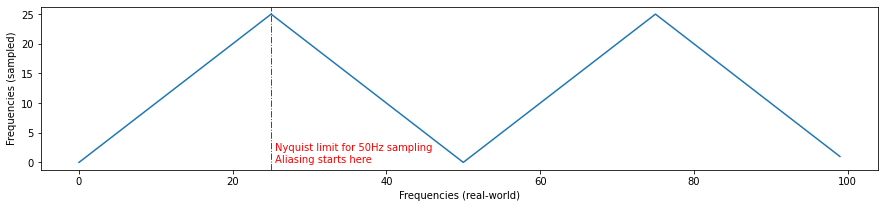

In [10]:
real_world_freqs = np.arange(0, 100, 1)
sampled_freqs = [abs(round(rwf / fs) * fs - rwf) for rwf in real_world_freqs]

fig, axes = plt.subplots(1, 1, figsize=(15,3))
axes.plot(real_world_freqs, sampled_freqs)

nyquist_limit = fs / 2
axes.axvline(nyquist_limit, color='r', linestyle="-.", linewidth=1)
axes.text(nyquist_limit + 0.5, 0, "Nyquist limit for 50Hz sampling\nAliasing starts here", color='r')
axes.set_xlabel("Frequencies (real-world)")
axes.set_ylabel("Frequencies (sampled)")

Text(50.5, 93, 'Nyquist limit for 100Hz sampling\nAliasing starts here')

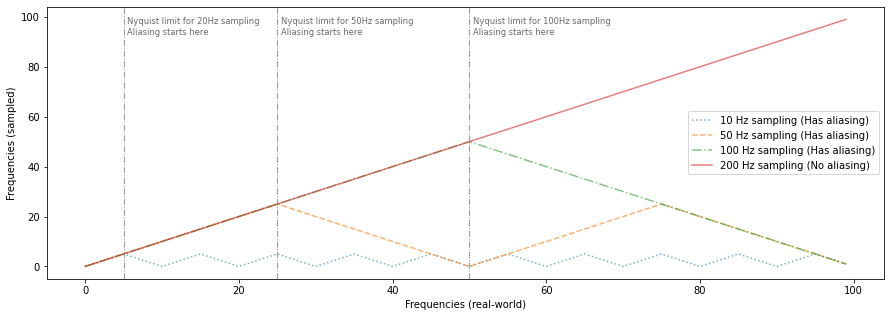

In [11]:
real_world_freqs = np.arange(0, 100, 1)

sampling_rate_10hz = 10
sampled_freqs_at_10hz = [abs(round(rwf / sampling_rate_10hz) * sampling_rate_10hz - rwf) for rwf in real_world_freqs]

sampling_rate_50hz = 50
sampled_freqs_at_50hz = [abs(round(rwf / sampling_rate_50hz) * sampling_rate_50hz - rwf) for rwf in real_world_freqs]

sampling_rate_100hz = 100
sampled_freqs_at_100hz = [abs(round(rwf / sampling_rate_100hz) * sampling_rate_100hz - rwf) for rwf in real_world_freqs]

sampling_rate_200hz = 200
sampled_freqs_at_200hz = [abs(round(rwf / sampling_rate_200hz) * sampling_rate_200hz - rwf) for rwf in real_world_freqs]

fig, axes = plt.subplots(1, 1, figsize=(15,5))
axes.plot(real_world_freqs, sampled_freqs_at_10hz, alpha = 0.6, linestyle=":", label="10 Hz sampling (Has aliasing)")
axes.plot(real_world_freqs, sampled_freqs_at_50hz, alpha = 0.6, linestyle="--", label="50 Hz sampling (Has aliasing)")
axes.plot(real_world_freqs, sampled_freqs_at_100hz, alpha = 0.6, linestyle="-.", label="100 Hz sampling (Has aliasing)")
axes.plot(real_world_freqs, sampled_freqs_at_200hz, alpha = 0.6, linestyle="-", label="200 Hz sampling (No aliasing)")

axes.set_xlabel("Frequencies (real-world)")
axes.set_ylabel("Frequencies (sampled)")
axes.legend()

# nyquist_limit = fs / 2
axes.axvline(sampling_rate_10hz / 2, color='gray', linestyle="-.", linewidth=1, alpha=0.8)
axes.text(sampling_rate_10hz / 2 + 0.5, 93, "Nyquist limit for 20Hz sampling\nAliasing starts here", color='dimgray', fontsize='smaller')

axes.axvline(sampling_rate_50hz / 2, color='gray', linestyle="-.", linewidth=1, alpha=0.8)
axes.text(sampling_rate_50hz / 2 + 0.5, 93, "Nyquist limit for 50Hz sampling\nAliasing starts here", color='dimgray', fontsize='smaller')

axes.axvline(sampling_rate_100hz / 2, color='gray', linestyle="-.", linewidth=1, alpha=0.8)
axes.text(sampling_rate_100hz / 2 + 0.5, 93, "Nyquist limit for 100Hz sampling\nAliasing starts here", color='dimgray', fontsize='smaller')

Sampling rate: 50.0 Hz


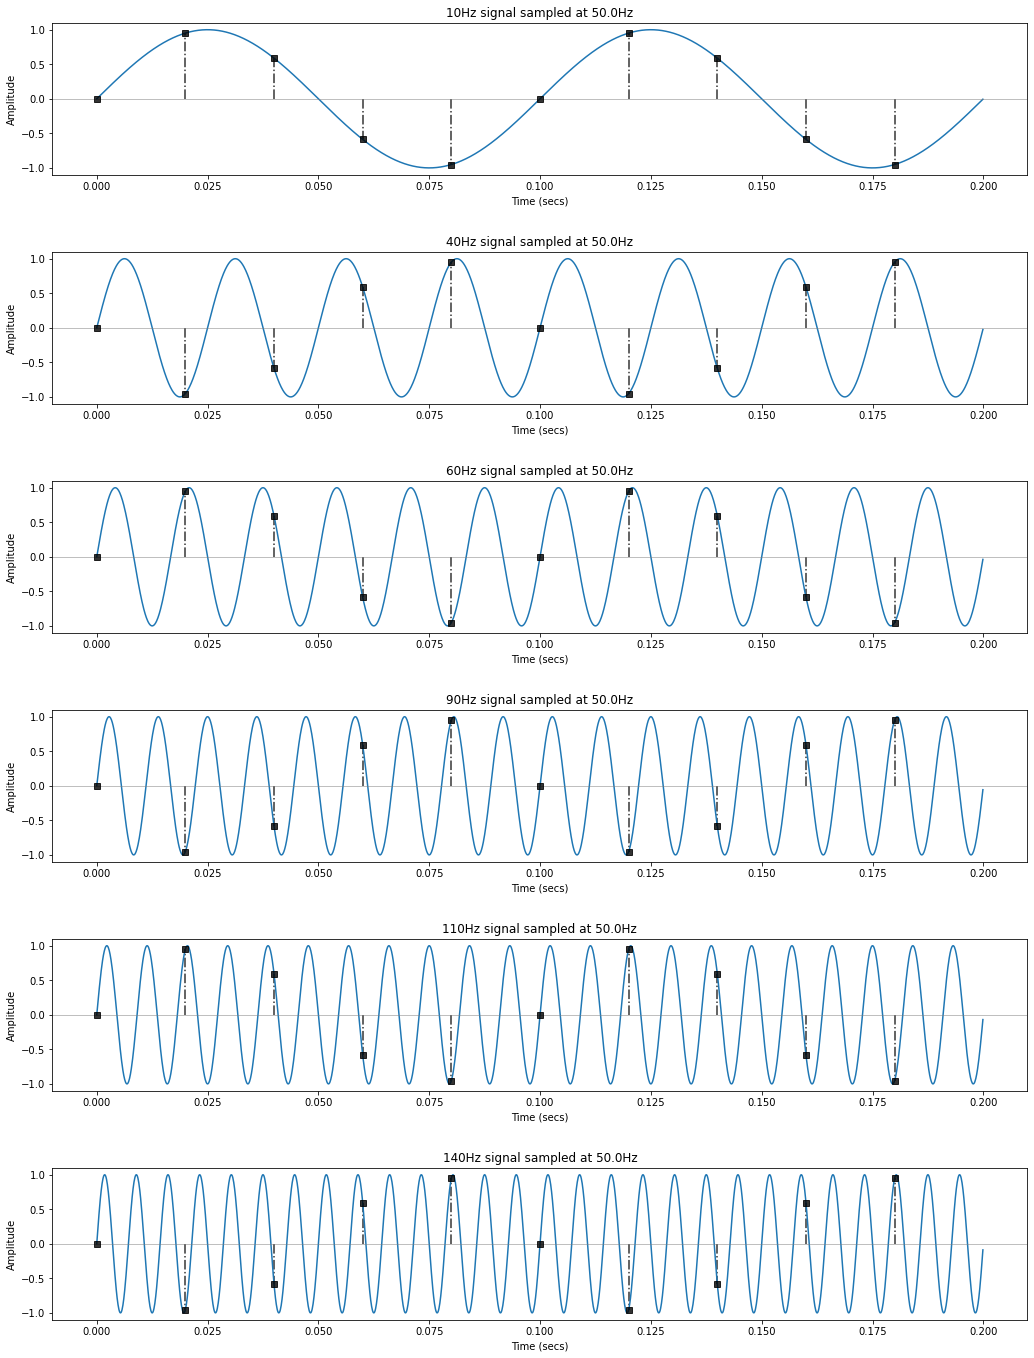

In [13]:
# feel free to change these values to see other patterns
real_world_freqs = [10, 40, 60, 90, 110, 140]
signalpro.plot_sampling_demonstration(total_time_in_secs, real_world_freqs)

Sampling rate: 50.0 Hz


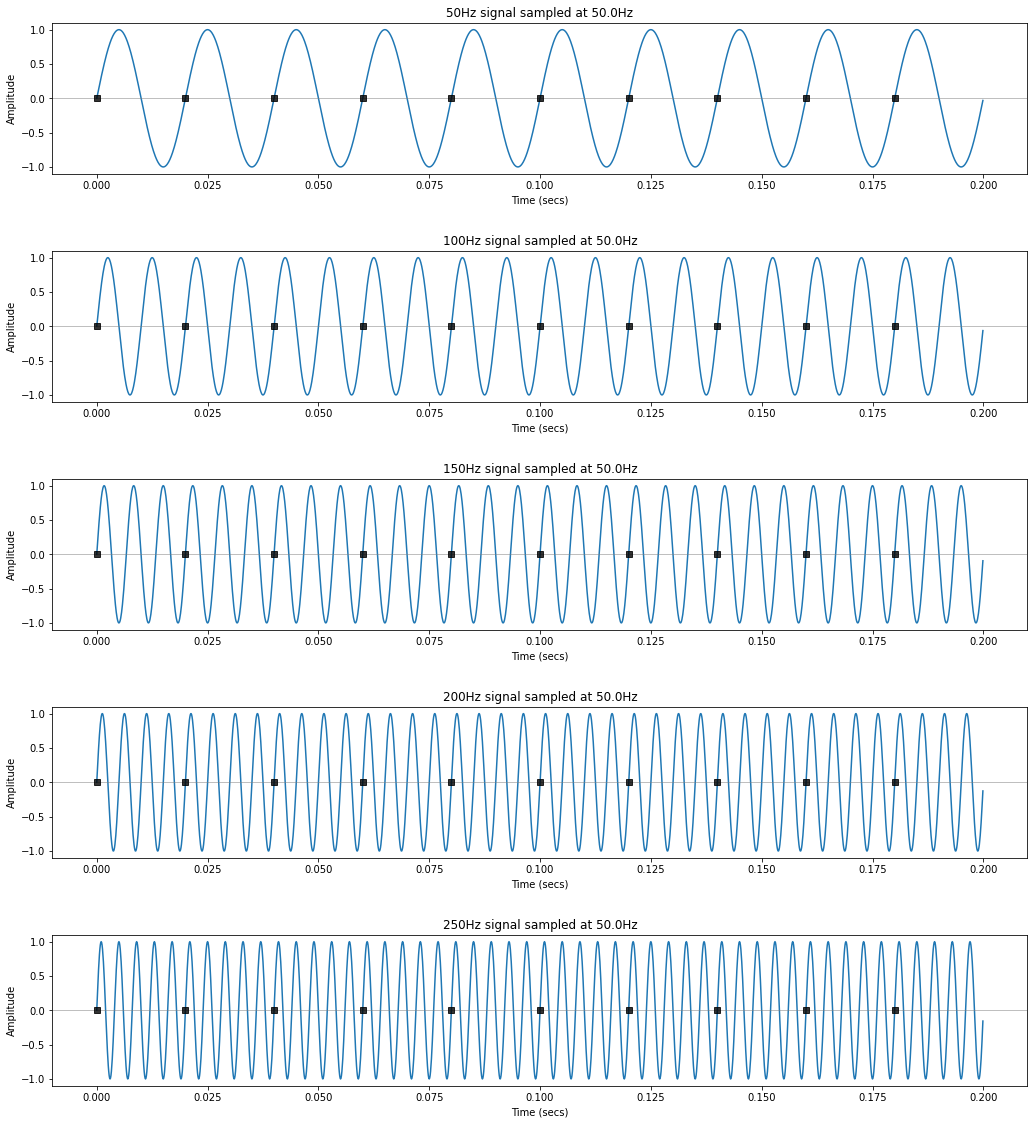

In [15]:
# aliasing to zero
real_world_freqs = [50, 100, 150, 200, 250]
signalpro.plot_sampling_demonstration(total_time_in_secs, real_world_freqs)